In [1]:
import os
import sys

#if "/opt/ros/kinetic/lib/python2.7/dist-packages" in sys.path:
#   sys.path.remove("/opt/ros/kinetic/lib/python2.7/dist-packages")
import cv2
import numpy as np
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches, lines
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
%matplotlib inline

from pycocotools.coco import COCO
#matplotlib.use('TkAgg')

def showAnns(anns):
    if len(anns) == 0:
        return 0
    ax = plt.gca()
    ax.set_autoscale_on(False)
    captions = []
    polygons = []
    rectangles = []
    color = []
    for ann in anns:
        c = (np.random.random((1, 3)) * 0.6 + 0.4).tolist()[0]
        if 'segmentation' in ann:
            if type(ann['segmentation']) == list:
                # polygon
                for seg in ann['segmentation']:
                    #print(132131,ann['category_id'])
                    #print(cat_names[0])
                    captions.append(cat_names[ann['category_id']-1])
                    poly = np.array(seg).reshape((int(len(seg) / 2), 2))
                    l_corner, w, h = (ann['bbox'][0], ann['bbox'][1]), ann['bbox'][2], ann['bbox'][3]
                    rectangles.append(Rectangle(l_corner, w, h))
                    polygons.append(Polygon(poly))
                    color.append(c)

    p = PatchCollection(rectangles, facecolor='none', edgecolors=color, alpha=1, linestyle='--', linewidths=2)
    ax.add_collection(p)

    for i in range(len(captions)):
        x = rectangles[i].xy[0]
        y = rectangles[i].xy[1]
        ax.text(x, y, captions[i], size=10, verticalalignment='top', color='w', backgroundcolor="none")

    p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.6)
    ax.add_collection(p)
    #p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
    p = PatchCollection(polygons, facecolor='none', edgecolors='b', linewidths=0.5)
    ax.add_collection(p)
    print('Ok!')

loading annotations into memory...
Done (t=1.45s)
creating index...
index created!
Ok!


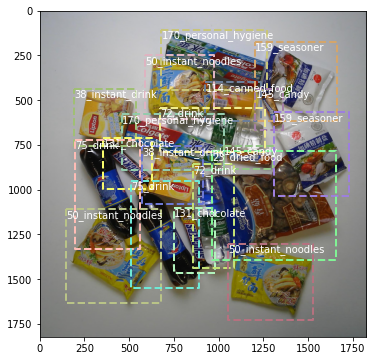

In [5]:
# annfile = r"D:\datasets\rpc_list\synthesize_24000_train.json"
# imgroot = r'D:\datasets\rpc_list\synthesize_24000_train_shadow'
annfile = r"D:\datasets\retail_product_checkout\instances_val2019.json"
imgroot = r'D:\datasets\retail_product_checkout\val2019'
%matplotlib inline
import random
coco = COCO(annfile)
cats = coco.loadCats(coco.getCatIds())
cat_names = [cat['name'] for cat in cats]
# print(cat_names)
catids = coco.getCatIds(catNms=cat_names[random.randint(0,len(cat_names))])
imgids = coco.getImgIds(catIds=[75])
fig = plt.figure(figsize=(9, 6))
if 1:
    img = coco.loadImgs(imgids[np.random.randint(0, len(imgids))])[0]
    #img = coco.loadImgs(38602)[0]
    #img = coco.loadImgs(imgids[367])[0]
    #print(img)
    I = io.imread(os.path.join(imgroot, img['file_name']))
    #print(img['file_name'])
    plt.imshow(I)
    annids = coco.getAnnIds(imgIds=img['id'])
    anns = coco.loadAnns(annids)
    showAnns(anns)
    #plt.show()
    # fig.savefig('static_map1.png')
    # print(111111111)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
['1_puffed_food', '2_puffed_food', '3_puffed_food', '4_puffed_food', '5_puffed_food', '6_puffed_food', '7_puffed_food', '8_puffed_food', '9_puffed_food', '10_puffed_food', '11_puffed_food', '12_puffed_food', '13_dried_fruit', '14_dried_fruit', '15_dried_fruit', '16_dried_fruit', '17_dried_fruit', '18_dried_fruit', '19_dried_fruit', '20_dried_fruit', '21_dried_fruit', '22_dried_food', '23_dried_food', '24_dried_food', '25_dried_food', '26_dried_food', '27_dried_food', '28_dried_food', '29_dried_food', '30_dried_food', '31_instant_drink', '32_instant_drink', '33_instant_drink', '34_instant_drink', '35_instant_drink', '36_instant_drink', '37_instant_drink', '38_instant_drink', '39_instant_drink', '40_instant_drink', '41_instant_drink', '42_instant_noodles', '43_instant_noodles', '44_instant_noodles', '45_instant_noodles', '46_instant_noodles', '47_instant_noodles', '48_instant_noodles', '49_instant_noodles'

ValueError: high <= 0

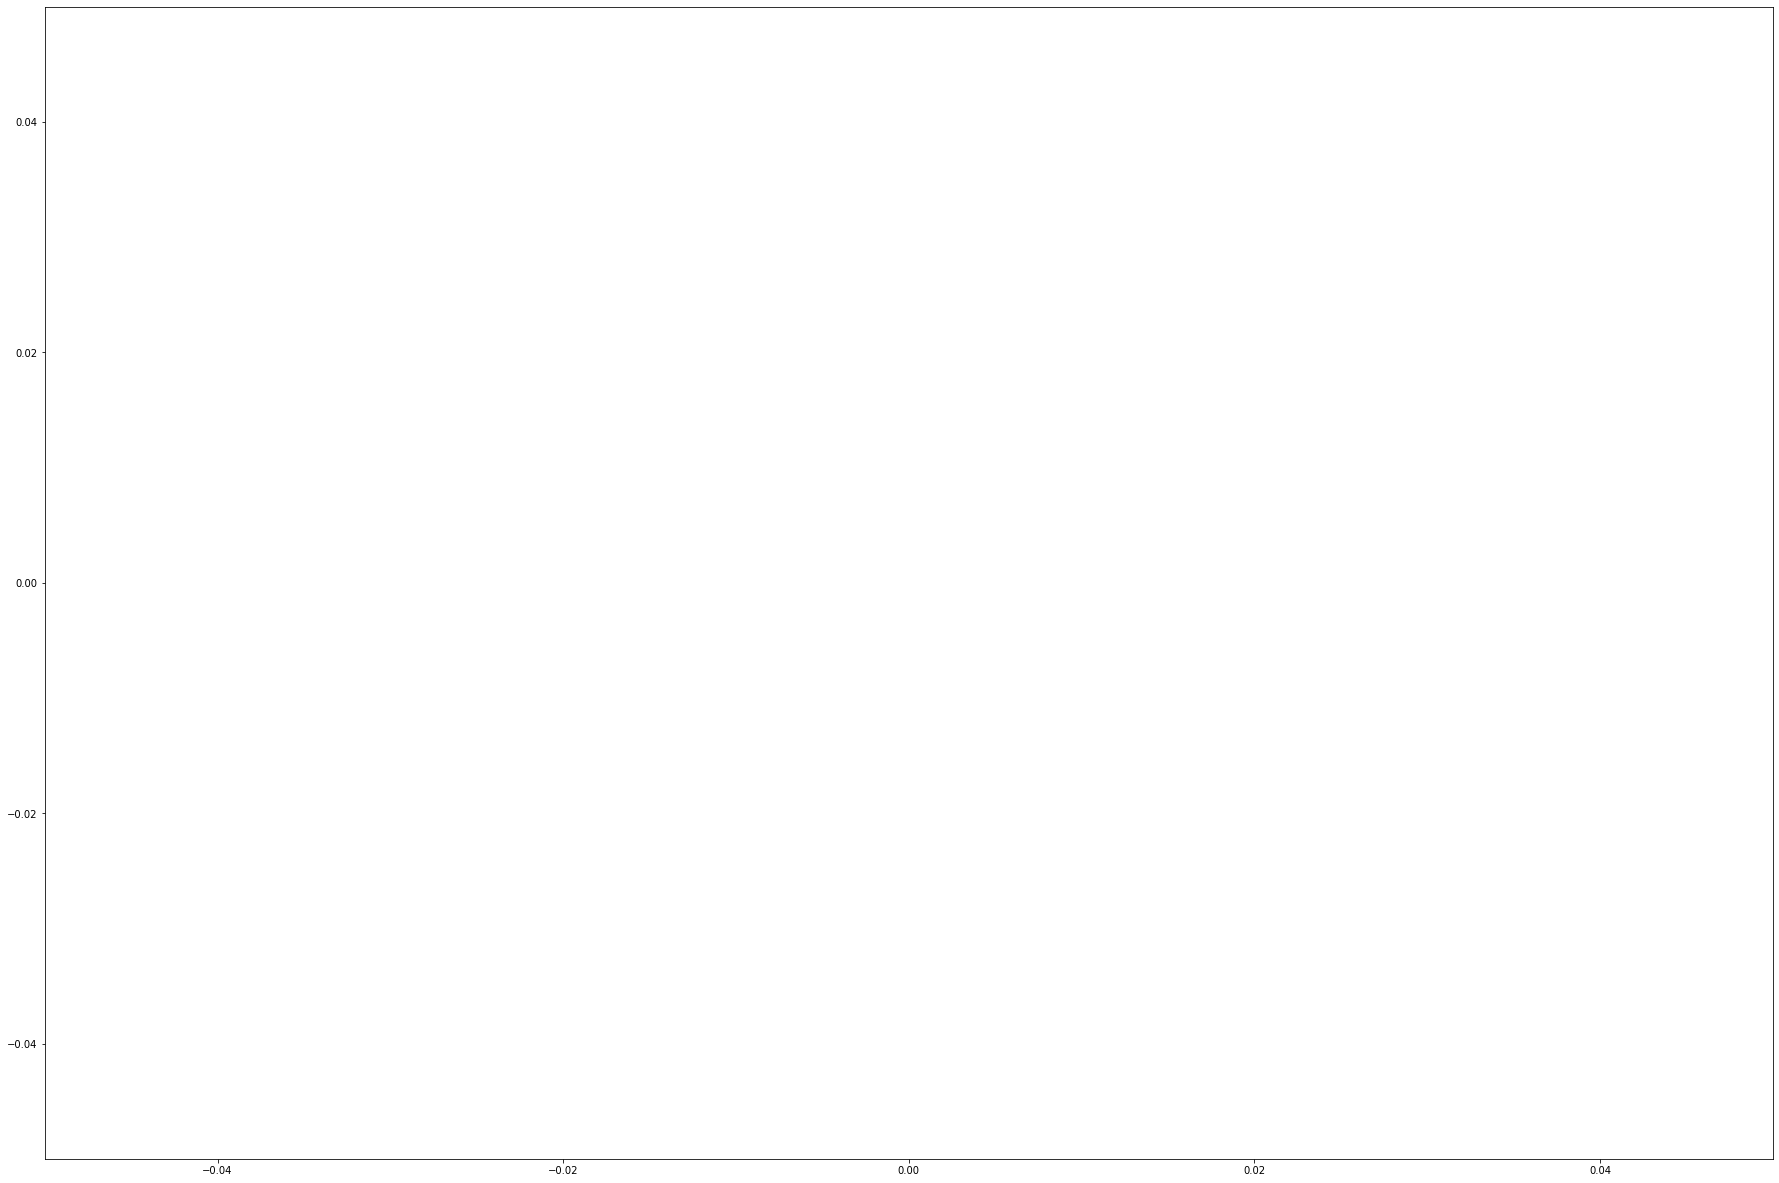

In [5]:
annfile = r'D:\datasets\rpc_list\synthesize_24000_train.json'
imgroot = r'D:\datasets\rpc_list\synthesize_24000_train_shadow'
%matplotlib inline
import random
coco = COCO(annfile)
cats = coco.loadCats(coco.getCatIds())
cat_names = [cat['name'] for cat in cats]
print(cat_names)
catids = coco.getCatIds(catNms=random.randint(0,len(cat_names)-1))
imgids = coco.getImgIds(catIds=catids)
def draw(m,n,i):
    img = coco.loadImgs(imgids[np.random.randint(0, len(imgids))])[0]
    I = io.imread(os.path.join(imgroot, img['file_name']))  
    plt.subplot(m,n,i)
    plt.axis('off')
    plt.title(img['file_name'],fontsize=8,color='blue')
    plt.imshow(I, aspect='equal')
    annids = coco.getAnnIds(imgIds=img['id'])
    anns = coco.loadAnns(annids)
    showAnns(anns)
if 1:
    m=4
    n=4
    plt.figure(figsize=(m*6,n*4))
    plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
    plt.margins(0,0)
    #fig = plt.figure(figsize=(18*m,12*n))
    for i in range(1,m*n+1):
        draw(m,n,i)
    plt.savefig('static_map.png')